In [11]:
#libraries and packages needed:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

## outliers analysis:

In [12]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    annotationstype = False
    cbar_length = 0.7
    
    # levels of theory:
    lots = {'B971' : 'Hybrid', 'B3LYP' : 'Hybrid', 'wB97XD' : 'Hybrid', 'M062X' : 'Hybrid', 'B2PLYP' : 'DH',}
    
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss = {'6-31Gs' : 'DZ',
           'pcseg-1' : 'DZ', 'AUG-pcseg-1' : 'DZ',
           'Def2SVPD' : 'DZ',
           'cc-pVDZ' : 'DZ',
           'pcseg-2' : 'TZ', 'AUG-pcseg-2' : 'TZ',
           'Def2TZVPD' : 'TZ',
           'cc-pVTZ' : 'TZ'}
    
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'def2-SVPD', 'cc-pVDZ', 'pcseg-2', 'aug-pcseg-2', 'def2-TZVPD', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    annotationstype = True
    cbar_length = 0.5
    
    # levels of theory:
    lots = {'B3LYP' : 'Hybrid', 'B971' : 'Hybrid', 'PBE1PBE' : 'Hybrid',
            'TPSSh' : 'Hybrid', 'M062X' : 'Hybrid', 'wB97XD' : 'Hybrid',
            'B2PLYP' : 'DH', 'B2PLYPD' : 'DH'}
    
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss = {'6-31Gs' : 'DZ', '6-31Gss' : 'DZ',
           'pc-1' : 'DZ', 'pcseg-1' : 'DZ',
           'Def2SVP' : 'DZ', 'cc-pVDZ' : 'DZ', 
           'AUG-pcseg-1' : 'DZ', 'Def2SVPD' : 'DZ', 'AUG-cc-pVDZ' : 'DZ',
           'pc-2' : 'TZ', 'pcseg-2' : 'TZ',
           'Def2TZVPD' : 'TZ',
           'cc-pVTZ' : 'TZ',
           'AUG-pcseg-2' : 'TZ',}
    
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [13]:
#directories:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper'

#lists storing general data:
mcs = []
mcs_class_l = []
lots_l = []
bss_l = []

#lists storing outliers:
outlier_50cm = []
outlier_50cm_p = []

for lot in lots :
    
    for bs in bss :
        
        #variables storing the occurance of outliers > 50cm-1:
        count_50 = 0
        length = 0
        
        #data for the specific model chemsitry considered:
        data = pd.read_csv(f'{general_directory}\\harm_anharm_comparison.csv')
        data = data.query('Basis == @bs')

        mc = lot + '/' + bs
        
        #model chemistries not considered:
        if mc == 'B2PLYP/AUG-pcseg-2' or mc == 'B2PLYPD/AUG-pcseg-2' or mc == 'B2PLYP/Def2SVP' or mc == 'B2PLYPD/Def2SVP' or mc == 'B2PLYP/AUG-cc-pVDZ' or mc == 'B2PLYPD/AUG-cc-pVDZ' :
            
            count_50 = np.nan
            count_50_p = np.nan
        
        #model chemistries considered:
        else :
            
            for mc_freq_data, outlier in zip(data['Model Chemistry'], data['Outlier']) :
                
                if mc == mc_freq_data :
                    
                    if outlier == 1 :
                        
                        count_50 = count_50 + 1

                    length = length + 1
                
                else :
                    
                    continue
        
        #get percentage of outliers:
        if np.isnan(count_50) :
            
            count_50_p = count_50
        
        else :
            
            count_50_p = np.round((count_50 * 100)/length).astype(int)
        
        #appending to corresponding lists:
        mcs.append(lot + '/' + bs) #model chemistry (e.g. B971/6-31Gs)
        mcs_class_l.append(lots[lot] + '/' + bss[bs]) #model chemistry class (e.g. Hybrid/DZ)
        lots_l.append(lot) #level of theory (e.g. B971)
        bss_l.append(bs) #basis set (e.g. 6-31Gs)
        outlier_50cm.append(count_50)
        outlier_50cm_p.append(count_50_p)

#data frame to store all data:
outliers_df = pd.DataFrame()
outliers_df['ModChem'] = mcs
outliers_df['ModChem_Class'] = mcs_class_l
outliers_df['Method'] = lots_l
outliers_df['Basis'] = bss_l
outliers_df['Outlier_50cm'] = outlier_50cm
outliers_df['Outliers_50cm_percentage'] = outlier_50cm_p

#sorting the data in order of levels of theory (lots) and basis sets (bss):
outliers_df['Method'] = pd.Categorical(outliers_df['Method'], categories = lots, ordered = True)
outliers_df['Basis'] = pd.Categorical(outliers_df['Basis'], categories = bss, ordered = True)
outliers_df = outliers_df.sort_values(['Method', 'Basis'])

#storing into csv file
outliers_df.to_csv(f'{general_directory}\\outliers_frequency_specific.csv', index = False)

In [14]:
outliers_df

,ModChem,ModChem_Class,Method,Basis,Outlier_50cm,Outliers_50cm_percentage
0,B3LYP/6-31Gs,Hybrid/DZ,B3LYP,6-31Gs,129.0,11.0
1,B3LYP/6-31Gss,Hybrid/DZ,B3LYP,6-31Gss,108.0,9.0
2,B3LYP/pc-1,Hybrid/DZ,B3LYP,pc-1,117.0,9.0
3,B3LYP/pcseg-1,Hybrid/DZ,B3LYP,pcseg-1,118.0,9.0
4,B3LYP/Def2SVP,Hybrid/DZ,B3LYP,Def2SVP,135.0,11.0
...,...,...,...,...,...,...
107,B2PLYPD/pc-2,DH/TZ,B2PLYPD,pc-2,55.0,5.0
108,B2PLYPD/pcseg-2,DH/TZ,B2PLYPD,pcseg-2,62.0,5.0
109,B2PLYPD/Def2TZVPD,DH/TZ,B2PLYPD,Def2TZVPD,61.0,5.0
110,B2PLYPD/cc-pVTZ,DH/TZ,B2PLYPD,cc-pVTZ,62.0,5.0


## outliers heatmap:

In [15]:
#max and min values:
max_outliers_p = outliers_df['Outliers_50cm_percentage'].max()
min_outliers_p = outliers_df['Outliers_50cm_percentage'].min()

#rounding and ordering values:
outliers_p = outliers_df[['Method', 'Basis', 'Outliers_50cm_percentage']].pivot_table(columns = 'Basis', index = 'Method', values = 'Outliers_50cm_percentage')
outliers_p = outliers_p[list(bss)].round(1)

#function to plot outliers as heatmap:
def plot_heatmap(colour_scheme, c, l) :
    
    fig, ax = plt.subplots()
    
    outliers_heatmap = sns.heatmap(outliers_p,
                                   vmax = max_outliers_p, vmin = min_outliers_p, center = c, 
                                   annot = annotationstype, fmt = 'g',
                                   linewidths = 0.5, linecolor = 'w',
                                   cbar = True, cbar_kws = {'label' : l, 'shrink' : cbar_length, 'extend': 'max'},
                                   square = True, ax = ax,
                                   xticklabels = bss_labels,
                                   yticklabels = lots_labels,
                                   cmap = colour_scheme)

    plt.ylabel(r'\textbf{Method}')
    plt.xlabel(r'\textbf{Basis Set}')
        
    cbar = outliers_heatmap.collections[0].colorbar
    cbar.set_label(l, fontsize = 18)

C:\Users\natia\AppData\Local\Temp\ipykernel_18792\1821796057.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  outliers_p = outliers_df[['Method', 'Basis', 'Outliers_50cm_percentage']].pivot_table(columns = 'Basis', index = 'Method', values = 'Outliers_50cm_percentage')


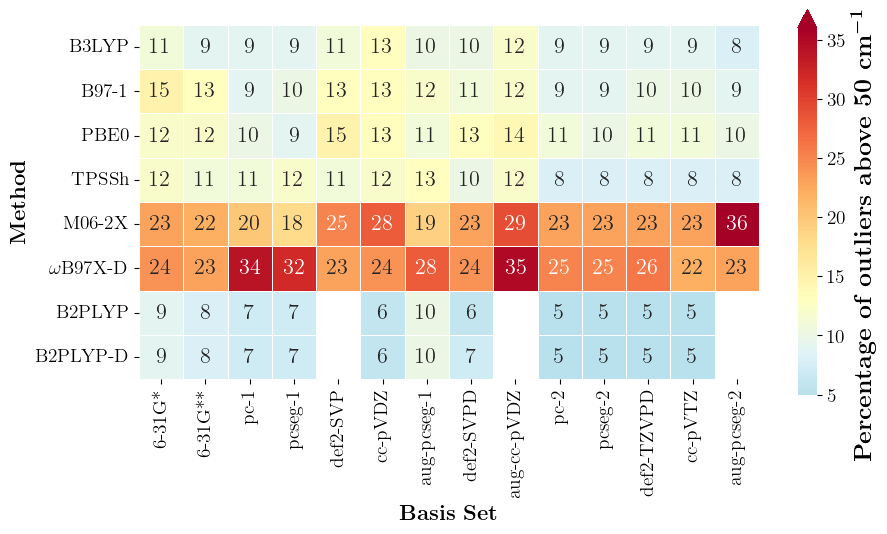

In [16]:
plot_heatmap('RdYlBu_r', 13, r'\textbf{Percentage of outliers above 50 cm}$\boldsymbol{^{-1}}$ $\boldsymbol{[\%]}$')